In [ ]:
import pandas as pd

In [ ]:
#!/bin/bash
!kaggle datasets download START-UMD/gtd

Dataset URL: https://www.kaggle.com/datasets/START-UMD/gtd
License(s): other
gtd.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip gtd.zip

Archive:  gtd.zip
replace globalterrorismdb_0718dist.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='utf-8')
except UnicodeDecodeError:
    # If UTF-8 fails, try 'latin-1' or 'ISO-8859-1'
    df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='latin-1')
    # or
    # df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

<ipython-input-19-ba77002b0c9b>:7: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='latin-1')


In [ ]:
column_names =list(df.columns)
column_names

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='iyear'>

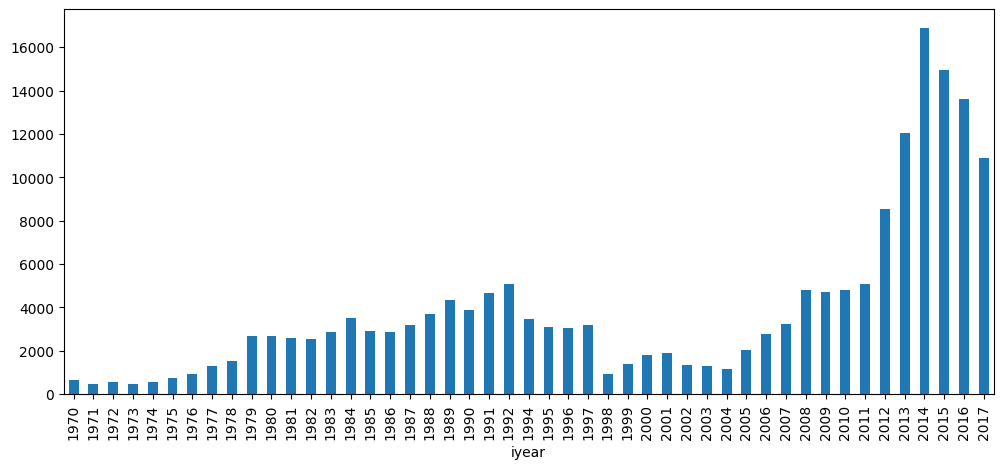

In [ ]:
plt.figure(figsize = (12,5))
df1 = df.groupby(df['iyear'])['eventid'].count().plot(kind = 'bar');
df1

In [ ]:
dc = df.groupby(df['country_txt'])['eventid'].count().reset_index()
dc

,country_txt,eventid
0,Afghanistan,12731
1,Albania,80
2,Algeria,2743
3,Andorra,1
4,Angola,499
...,...,...
200,Yemen,3347
201,Yugoslavia,203
202,Zaire,50
203,Zambia,62


<Axes: >

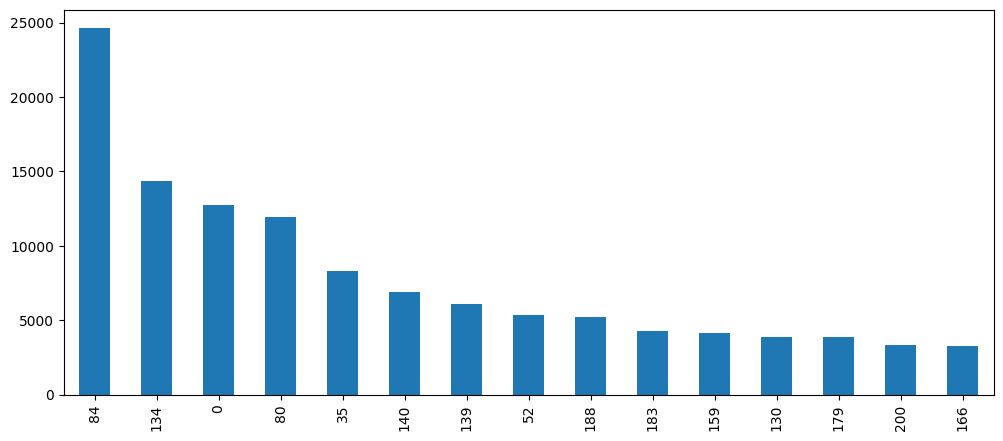

In [ ]:
plt.figure(figsize = (12,5))
dc = df.groupby(df['country_txt'])['eventid'].count().reset_index()
dc['eventid'].sort_values(ascending = False)[:15].plot(kind = 'bar')

In [ ]:
df.gname

,gname
0,MANO-D
1,23rd of September Communist League
2,Unknown
3,Unknown
4,Unknown
...,...
181686,Al-Shabaab
181687,Muslim extremists
181688,Bangsamoro Islamic Freedom Movement (BIFM)
181689,Unknown


<Axes: ylabel='gname'>

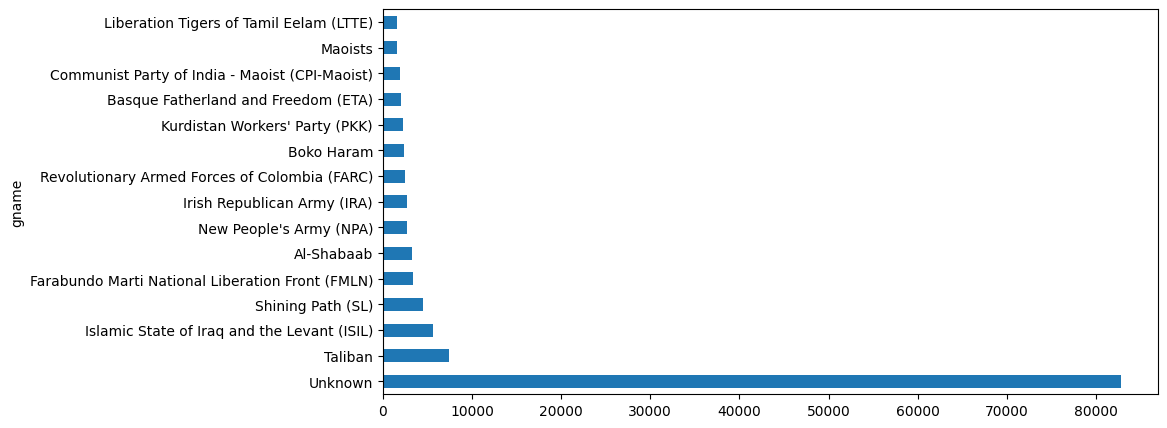

In [ ]:
plt.figure(figsize = (10,5))
dg = df.groupby(df['gname'])['eventid'].count().sort_values(ascending = False)[:15]
dg.plot(kind = 'barh')

In [ ]:
dg.reset_index()

,gname,eventid
0,Unknown,82782
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
5,Al-Shabaab,3288
6,New People's Army (NPA),2772
7,Irish Republican Army (IRA),2671
8,Revolutionary Armed Forces of Colombia (FARC),2487
9,Boko Haram,2418


In [ ]:
dg = dg.reset_index()
dg

,gname,eventid
0,Unknown,82782
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
5,Al-Shabaab,3288
6,New People's Army (NPA),2772
7,Irish Republican Army (IRA),2671
8,Revolutionary Armed Forces of Colombia (FARC),2487
9,Boko Haram,2418


<BarContainer object of 14 artists>

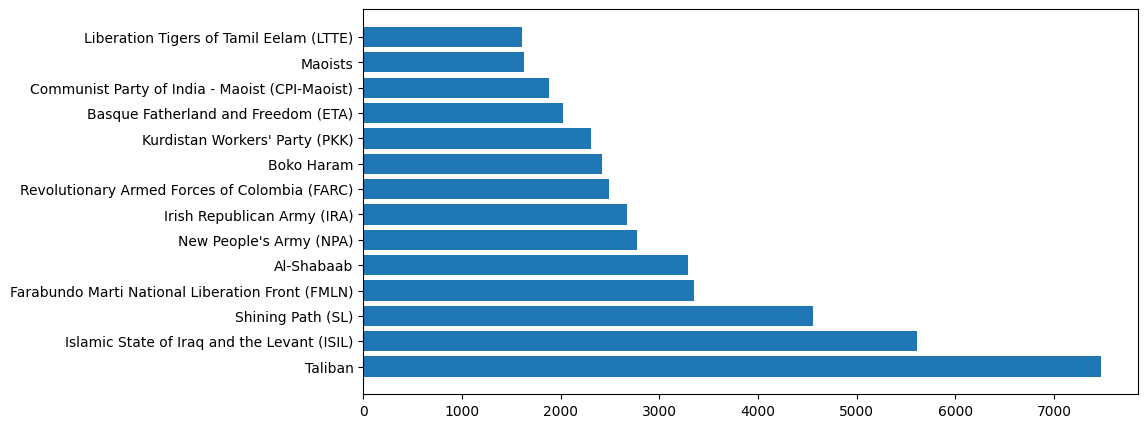

In [ ]:
df_new = dg[dg['gname'] != 'Unknown']
plt.figure(figsize = (10,5))
y = df_new['gname']
width = df_new['eventid']
plt.barh(y, width)

In [ ]:
df_new

,gname,eventid
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
5,Al-Shabaab,3288
6,New People's Army (NPA),2772
7,Irish Republican Army (IRA),2671
8,Revolutionary Armed Forces of Colombia (FARC),2487
9,Boko Haram,2418
10,Kurdistan Workers' Party (PKK),2310


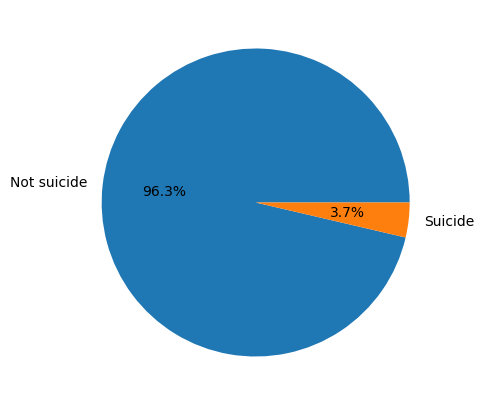

In [ ]:
plt.figure(figsize = (10,5))
s = df.groupby('suicide')['eventid'].count()
plt.pie(s.values, labels = ['Not suicide', 'Suicide'], autopct = '%.1f%%');

In [ ]:
df2 = df.groupby(df['gname'])['nkill'].sum().sort_values(ascending = False)[:15].reset_index()

In [ ]:
df2.where(df['gname'] != 'Unknown', inplace = True)


In [ ]:
df2 = df2.dropna()
df2

,gname,nkill
0,Unknown,112367.0
1,Islamic State of Iraq and the Levant (ISIL),38923.0
5,Liberation Tigers of Tamil Eelam (LTTE),10989.0
6,Al-Shabaab,9330.0
8,Nicaraguan Democratic Force (FDN),6662.0
9,Tehrik-i-Taliban Pakistan (TTP),6042.0
10,Revolutionary Armed Forces of Colombia (FARC),5661.0
11,Kurdistan Workers' Party (PKK),4955.0
13,Al-Qaida in Iraq,4381.0
14,Hutu extremists,4102.0


In [ ]:
plt.xticks

<function matplotlib.pyplot.xticks(ticks: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, *, minor: 'bool' = False, **kwargs) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Islamic State of Iraq and the Levant (ISIL)'),
  Text(2, 0, 'Liberation Tigers of Tamil Eelam (LTTE)'),
  Text(3, 0, 'Al-Shabaab'),
  Text(4, 0, 'Nicaraguan Democratic Force (FDN)'),
  Text(5, 0, 'Tehrik-i-Taliban Pakistan (TTP)'),
  Text(6, 0, 'Revolutionary Armed Forces of Colombia (FARC)'),
  Text(7, 0, "Kurdistan Workers' Party (PKK)"),
  Text(8, 0, 'Al-Qaida in Iraq'),
  Text(9, 0, 'Hutu extremists')])

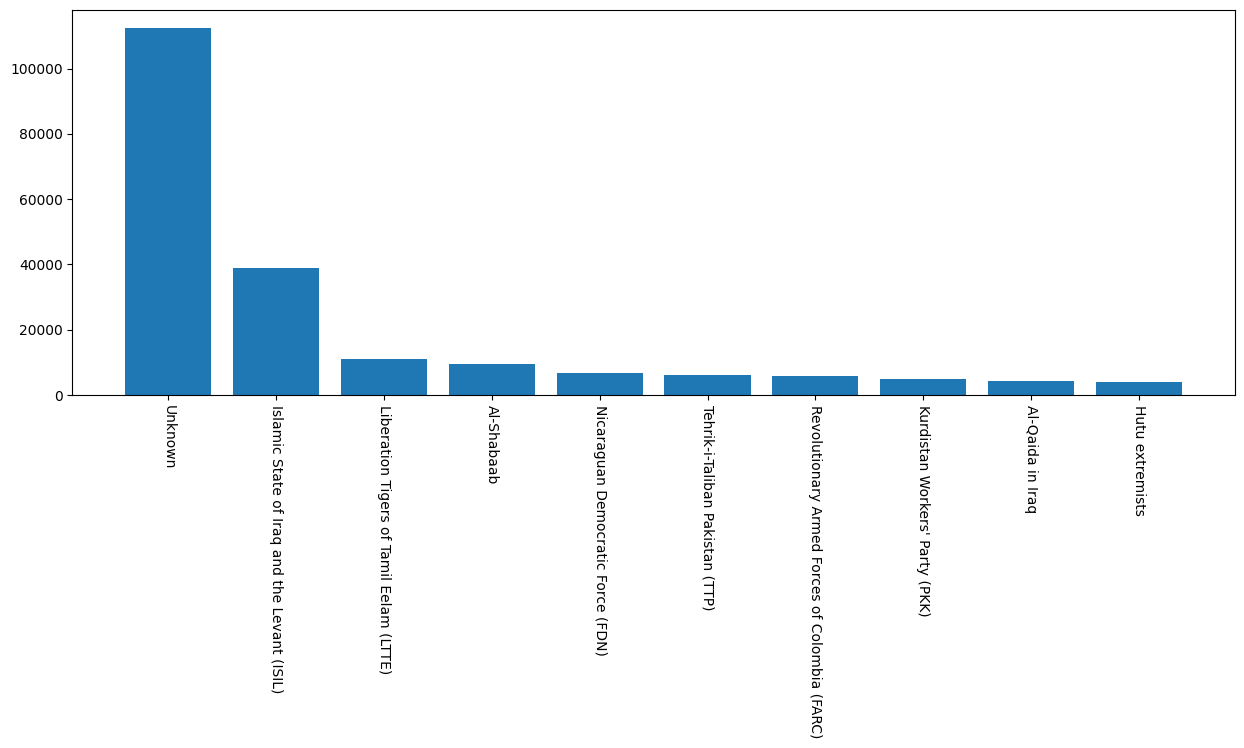

In [ ]:
plt.figure(figsize = (15,5))
plt.bar(df2['gname'], df2['nkill'])
plt.xticks(rotation=-90)


In [ ]:
df['longitude']

,longitude
0,-69.951164
1,-99.086624
2,120.599741
3,23.762728
4,130.396361
...,...
181686,45.385034
181687,35.942679
181688,124.437908
181689,93.940430


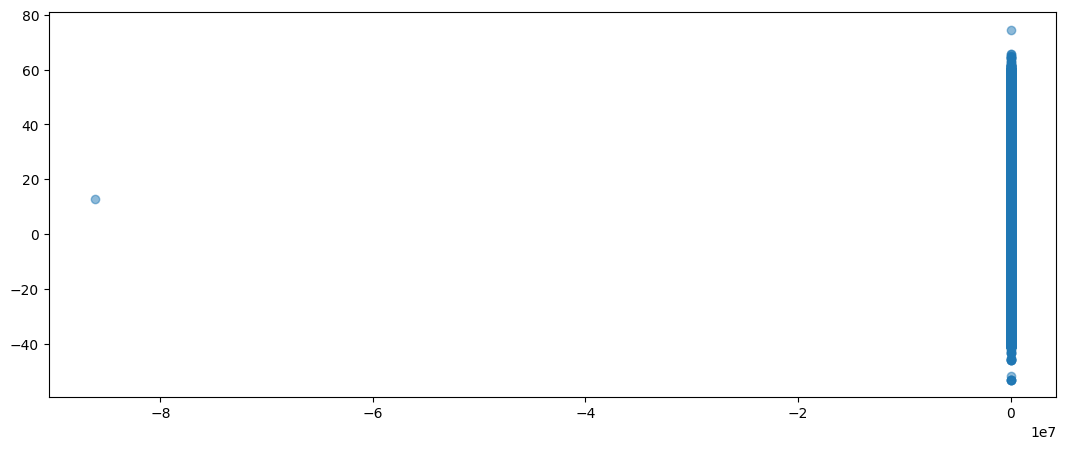

In [ ]:
plt.figure(figsize = (13,5))
plt.scatter(df.longitude, df.latitude, alpha = 0.5)

In [ ]:
df['latitude'].max()

74.633553

In [ ]:
new_df_2 = df[['latitude', 'longitude']]
new_df_2 = new_df_2[(new_df_2['longitude']> - 180)]
new_df_2

,latitude,longitude
0,18.456792,-69.951164
1,19.371887,-99.086624
2,15.478598,120.599741
3,37.997490,23.762728
4,33.580412,130.396361
...,...,...
181686,2.359673,45.385034
181687,35.407278,35.942679
181688,6.900742,124.437908
181689,24.798346,93.940430


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


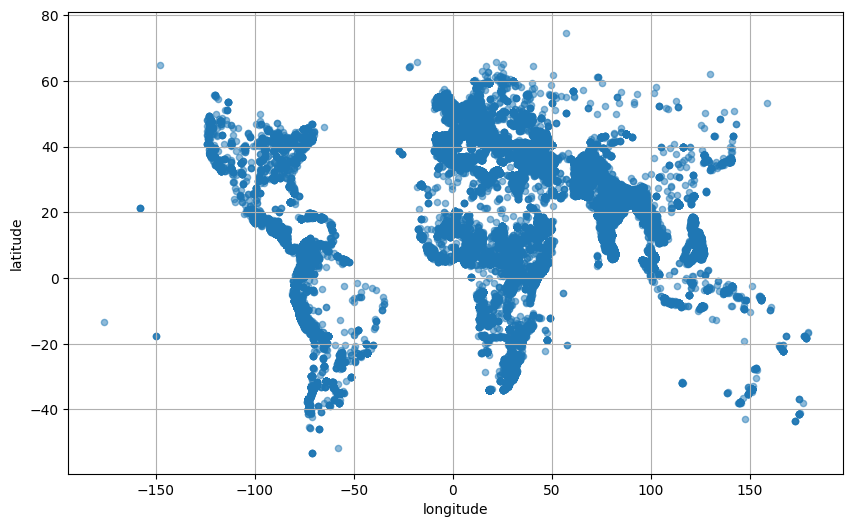

In [ ]:
new_df_2.plot(kind = 'scatter', x = 'longitude', y = 'latitude', cmap = 'jet', alpha = 0.5, grid = True, figsize = (10,6));

In [ ]:
df[['nkill', 'nkillus', 'nkillter']]

,nkill,nkillus,nkillter
0,1.0,NaN,NaN
1,0.0,NaN,NaN
2,1.0,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
181686,1.0,0.0,0.0
181687,2.0,0.0,0.0
181688,0.0,0.0,0.0
181689,0.0,0.0,0.0


In [ ]:
df['nkillter'].sum()

58291.0

In [ ]:
df['nkill'].sum()

411868.0

In [ ]:
df['nkillus'].sum()

5391.0

In [ ]:
df4 = df.groupby('country_txt')['nkill'].sum().sort_values(ascending=False)[:15].reset_index()
df4

,country_txt,nkill
0,Iraq,78589.0
1,Afghanistan,39384.0
2,Pakistan,23822.0
3,Nigeria,22682.0
4,India,19341.0
5,Sri Lanka,15530.0
6,Syria,15229.0
7,Colombia,14698.0
8,Peru,12771.0
9,El Salvador,12053.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Iraq'),
  Text(1, 0, 'Afghanistan'),
  Text(2, 0, 'Pakistan'),
  Text(3, 0, 'Nigeria'),
  Text(4, 0, 'India'),
  Text(5, 0, 'Sri Lanka'),
  Text(6, 0, 'Syria'),
  Text(7, 0, 'Colombia'),
  Text(8, 0, 'Peru'),
  Text(9, 0, 'El Salvador'),
  Text(10, 0, 'Algeria'),
  Text(11, 0, 'Nicaragua'),
  Text(12, 0, 'Somalia'),
  Text(13, 0, 'Philippines'),
  Text(14, 0, 'Yemen')])

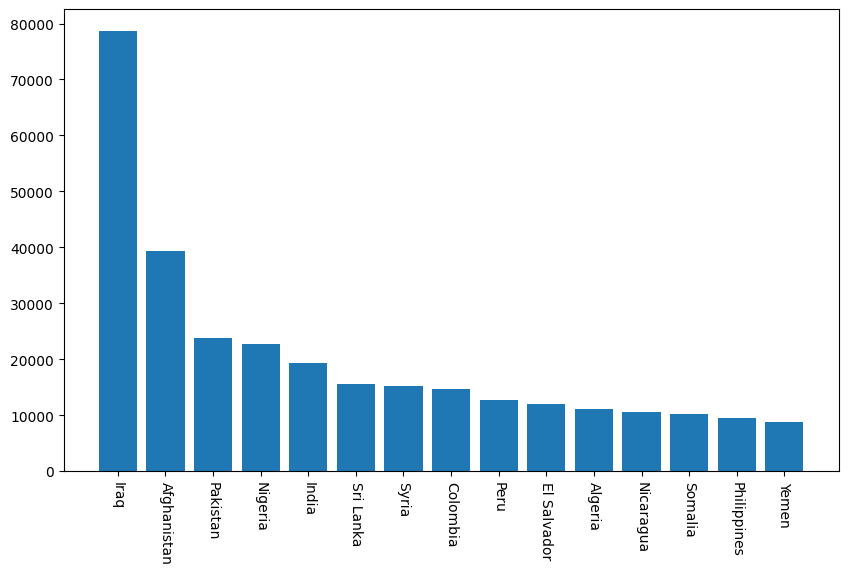

In [ ]:
plt.figure(figsize = (10,6))
plt.bar(df4['country_txt'], df4['nkill']);
plt.xticks(rotation=-90)